In [6]:
from sklearn.preprocessing import OneHotEncoder
# ^^^ pyforest auto-imports - don't write above this line
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Natural Language Processing - dealing with text data

In [7]:
imdb = pd.read_csv('./datasets/imdb_dataset.csv', encoding="latin1")

In [4]:
imdb.head()

,Review,Label
0,Once again Mr. Costner has dragged out a movie...,neg
1,This is an example of why the majority of acti...,neg
2,"First of all I hate those moronic rappers, who...",neg
3,Not even the Beatles could write songs everyon...,neg
4,Brass pictures (movies is not a fitting word f...,neg


In [9]:
imdb.shape

(50000, 2)

In [12]:
imdb.sample(10)

,Review,Label
37485,I had the misfortune to watch this rubbish on ...,neg
15985,I saw it last night and I was laughing out lou...,pos
12616,I first saw this film two years ago in the cin...,pos
43799,This is an exquisite film about the search for...,pos
27921,Its plain to see why the makers of Scary Movie...,neg
1805,"When I was a little girl, I absolutely adored ...",neg
22620,"Well, I'm an Italian horror big fan and I love...",pos
29757,Tony Scott destroys anything that may have bee...,neg
4839,I'm actually too drained to write this review ...,neg
14661,i adore this film as much as any one adores vi...,pos


## Documents vs Corpus

- **Documents**: each observation, each row of the dataset above.
    
- **Corpus**: the whole set of observations, the whole dataset. 

## Extracting features from text

- Transforming words in numbers

## One Hot Encoding

In [41]:
encoder = OneHotEncoder()

<IPython.core.display.Javascript object>

(50000, 49582)

- Too many words will lead to too many dimensions!
- Miss information about frequency of words
- Context is not captured nor order of words

In [54]:
encoder.fit_transform(imdb.Review.head(10).apply(lambda x : pd.Series(x.lower().split())).fillna(' '))

<10x2026 sparse matrix of type '<class 'numpy.float64'>'
	with 3080 stored elements in Compressed Sparse Row format>

## Count Vectorizer

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
train_text = ["Be yourself; everyone else is already taken.",
              "A room without books is like a body without a soul.",
              "Be the change that you wish to see in the world.",
              "If you tell the truth, you don't have to remember anything.",
              "Always forgive your enemies; nothing annoys them so much."
             ]

count_vectorizer = CountVectorizer()

In [53]:
count_vectorizer.fit_transform(imdb['Review'].head(10))

<10x803 sparse matrix of type '<class 'numpy.int64'>'
	with 1271 stored elements in Compressed Sparse Row format>

In [39]:
Out[38].toarray().shape

(50000, 103122)

In [18]:
count_vectorizer.fit(train_text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [19]:
count_vectorizer.vocabulary_

{'be': 4,
 'yourself': 37,
 'everyone': 11,
 'else': 9,
 'is': 16,
 'already': 0,
 'taken': 25,
 'room': 21,
 'without': 33,
 'books': 6,
 'like': 17,
 'body': 5,
 'soul': 24,
 'the': 28,
 'change': 7,
 'that': 27,
 'you': 35,
 'wish': 32,
 'to': 30,
 'see': 22,
 'in': 15,
 'world': 34,
 'if': 14,
 'tell': 26,
 'truth': 31,
 'don': 8,
 'have': 13,
 'remember': 20,
 'anything': 3,
 'always': 1,
 'forgive': 12,
 'your': 36,
 'enemies': 10,
 'nothing': 19,
 'annoys': 2,
 'them': 29,
 'so': 23,
 'much': 18}

In [20]:
count_vectorizer.vocabulary_.get('like')

17

In [21]:
count_vectorizer.vocabulary_['like']

17

In [22]:
count_vectorizer.stop_words_

set()

In [23]:
transformed_vector = count_vectorizer.transform(train_text)
transformed_vector

<5x38 sparse matrix of type '<class 'numpy.int64'>'
	with 43 stored elements in Compressed Sparse Row format>

In [24]:
train_text

['Be yourself; everyone else is already taken.',
 'A room without books is like a body without a soul.',
 'Be the change that you wish to see in the world.',
 "If you tell the truth, you don't have to remember anything.",
 'Always forgive your enemies; nothing annoys them so much.']

In [28]:
count_vectorizer.vocabulary_.get('without')

33

In [31]:
transformed_vector.toarray()[1][count_vectorizer.vocabulary_.get('without')]

2

In [27]:
transformed_vector.toarray()

array([[1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]])

In [33]:
count_vectorizer.get_feature_names()

['already',
 'always',
 'annoys',
 'anything',
 'be',
 'body',
 'books',
 'change',
 'don',
 'else',
 'enemies',
 'everyone',
 'forgive',
 'have',
 'if',
 'in',
 'is',
 'like',
 'much',
 'nothing',
 'remember',
 'room',
 'see',
 'so',
 'soul',
 'taken',
 'tell',
 'that',
 'the',
 'them',
 'to',
 'truth',
 'wish',
 'without',
 'world',
 'you',
 'your',
 'yourself']

In [32]:
pd.DataFrame(transformed_vector.toarray(), columns=count_vectorizer.get_feature_names())

,already,always,annoys,anything,be,body,books,change,don,else,...,the,them,to,truth,wish,without,world,you,your,yourself
0,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2,0,0,0,0,1,0,0,1,0,0,...,2,0,1,0,1,0,1,1,0,0
3,0,0,0,1,0,0,0,0,1,0,...,1,0,1,1,0,0,0,2,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [14]:
train_text

['Be yourself; everyone else is already taken.',
 'A room without books is like a body without a soul.',
 'Be the change that you wish to see in the world.',
 "If you tell the truth, you don't have to remember anything.",
 'Always forgive your enemies; nothing annoys them so much.']

- Deals with the matter of frequency only
- The other drawbacks remain

## N-Grams

### Bigram

In [64]:
n_gram_vectorizer = CountVectorizer(ngram_range=(2, 2))

In [65]:
transformed_vector = n_gram_vectorizer.fit_transform(train_text)

transformed_vector.shape

(5, 41)

In [66]:
n_gram_vectorizer.vocabulary_

{'be yourself': 4,
 'yourself everyone': 40,
 'everyone else': 11,
 'else is': 9,
 'is already': 16,
 'already taken': 0,
 'room without': 21,
 'without books': 34,
 'books is': 6,
 'is like': 17,
 'like body': 18,
 'body without': 5,
 'without soul': 35,
 'be the': 3,
 'the change': 26,
 'change that': 7,
 'that you': 25,
 'you wish': 38,
 'wish to': 33,
 'to see': 31,
 'see in': 22,
 'in the': 15,
 'the world': 28,
 'if you': 14,
 'you tell': 37,
 'tell the': 24,
 'the truth': 27,
 'truth you': 32,
 'you don': 36,
 'don have': 8,
 'have to': 13,
 'to remember': 30,
 'remember anything': 20,
 'always forgive': 1,
 'forgive your': 12,
 'your enemies': 39,
 'enemies nothing': 10,
 'nothing annoys': 19,
 'annoys them': 2,
 'them so': 29,
 'so much': 23}

In [67]:
transformed_vector.toarray()

array([[1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [19]:
n_gram_vectorizer.inverse_transform(transformed_vector)

[array(['be yourself', 'yourself everyone', 'everyone else', 'else is',
        'is already', 'already taken'], dtype='<U17'),
 array(['room without', 'without books', 'books is', 'is like',
        'like body', 'body without', 'without soul'], dtype='<U17'),
 array(['be the', 'the change', 'change that', 'that you', 'you wish',
        'wish to', 'to see', 'see in', 'in the', 'the world'], dtype='<U17'),
 array(['if you', 'you tell', 'tell the', 'the truth', 'truth you',
        'you don', 'don have', 'have to', 'to remember',
        'remember anything'], dtype='<U17'),
 array(['always forgive', 'forgive your', 'your enemies',
        'enemies nothing', 'nothing annoys', 'annoys them', 'them so',
        'so much'], dtype='<U17')]

- Usually able to find authorship patterns

## Tf-IDf

- Term frequency - if a word occurs often in a document, the algorithm will consider the word important

- Inverse Document Frequency - if a word occurs frequently on the **corpus**, it means it has few information (information theory)

In [92]:
train_text = ['Be yourself; everyone else is already taken change.',
             'A room without books is like a body without a soul.',
             'Be the change that you wish to see in the world and change everything, this would change it all!.',
             "If you tell the truth, you don't have to remember change anything.",
             'Always forgive your enemies; nothing annoys change them so much.']

train_text

['Be yourself; everyone else is already taken change.',
 'A room without books is like a body without a soul.',
 'Be the change that you wish to see in the world and change everything, this would change it all!.',
 "If you tell the truth, you don't have to remember change anything.",
 'Always forgive your enemies; nothing annoys change them so much.']

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

tfidf_vectorizer = TfidfVectorizer()

In [94]:
tfidf_vector = tfidf_vectorizer.fit_transform(train_text)

tfidf_vectorizer.vocabulary_

{'be': 6,
 'yourself': 43,
 'everyone': 13,
 'else': 11,
 'is': 19,
 'already': 1,
 'taken': 29,
 'change': 9,
 'room': 25,
 'without': 38,
 'books': 8,
 'like': 21,
 'body': 7,
 'soul': 28,
 'the': 32,
 'that': 31,
 'you': 41,
 'wish': 37,
 'to': 35,
 'see': 26,
 'in': 18,
 'world': 39,
 'and': 3,
 'everything': 14,
 'this': 34,
 'would': 40,
 'it': 20,
 'all': 0,
 'if': 17,
 'tell': 30,
 'truth': 36,
 'don': 10,
 'have': 16,
 'remember': 24,
 'anything': 5,
 'always': 2,
 'forgive': 15,
 'your': 42,
 'enemies': 12,
 'nothing': 23,
 'annoys': 4,
 'them': 33,
 'so': 27,
 'much': 22}

In [95]:
tfidf_vector.toarray()

array([[0.        , 0.38868358, 0.        , 0.        , 0.        ,
        0.        , 0.31358747, 0.        , 0.        , 0.21897755,
        0.        , 0.38868358, 0.        , 0.38868358, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.31358747,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.38868358,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.38868358],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.32189611, 0.32189611, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.25970376,
        0.        , 0.32189611, 0.        , 0.        , 0.        ,
        0.32189611, 0.        , 0.        , 0.32189611, 0. 

In [96]:
tfidf_vector.toarray()[2]

array([0.23304382, 0.        , 0.        , 0.23304382, 0.        ,
       0.        , 0.18801828, 0.        , 0.        , 0.39387846,
       0.        , 0.        , 0.        , 0.        , 0.23304382,
       0.        , 0.        , 0.        , 0.23304382, 0.        ,
       0.23304382, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.23304382, 0.        , 0.        , 0.        ,
       0.        , 0.23304382, 0.37603657, 0.        , 0.23304382,
       0.18801828, 0.        , 0.23304382, 0.        , 0.23304382,
       0.23304382, 0.18801828, 0.        , 0.        ])

In [97]:
tfidf_vector.toarray()[2][tfidf_vectorizer.vocabulary_.get('change')]

0.3938784647385806

In [98]:
tfidf_vectorizer.vocabulary_.get('change')

9

In [99]:
pd.DataFrame(zip(tfidf_vectorizer.get_feature_names(), tfidf_vectorizer.idf_))

,0,1
0,all,2.098612
1,already,2.098612
2,always,2.098612
3,and,2.098612
4,annoys,2.098612
5,anything,2.098612
6,be,1.693147
7,body,2.098612
8,books,2.098612
9,change,1.182322


In [100]:
pd.DataFrame(tfidf_vector.toarray(), columns=tfidf_vectorizer.get_feature_names())

,all,already,always,and,annoys,anything,be,body,books,change,...,this,to,truth,wish,without,world,would,you,your,yourself
0,0.000000,0.388684,0.000000,0.000000,0.000000,0.000000,0.313587,0.000000,0.000000,0.218978,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.388684
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.321896,0.321896,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.643792,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.233044,0.000000,0.000000,0.233044,0.000000,0.000000,0.188018,0.000000,0.000000,0.393878,...,0.233044,0.188018,0.000000,0.233044,0.000000,0.233044,0.233044,0.188018,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.298502,0.000000,0.000000,0.000000,0.168171,...,0.000000,0.240830,0.298502,0.000000,0.000000,0.000000,0.000000,0.481659,0.000000,0.000000
4,0.000000,0.000000,0.327607,0.000000,0.327607,0.000000,0.000000,0.000000,0.000000,0.184568,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.327607,0.000000


- still not capturing context.

## Word Embeddings

London - **2343432**900

Paris - **2343432**382

- word2vec

London - England

Paris - France

-----
Queen - King

Woman - Man

# Classification


In [145]:
imdb = imdb#.sample(1000, random_state=42)

In [146]:
X = imdb['Review']

y = imdb['Label'].apply(lambda x : 1 if x=='neg' else 0)

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [148]:
count_vectorizer = CountVectorizer()

transformed_vector = count_vectorizer.fit_transform(X_train)

In [149]:
tfidf_transformer = TfidfTransformer()
                                            
tfidf_vector = tfidf_transformer.fit_transform(transformed_vector)

In [150]:
tfidf_vec = TfidfVectorizer()

In [151]:
tfidf_vec.fit_transform(X_train)

<900x16601 sparse matrix of type '<class 'numpy.float64'>'
	with 117314 stored elements in Compressed Sparse Row format>

In [152]:
from sklearn.naive_bayes import GaussianNB

In [153]:
clf = GaussianNB()
clf.fit(tfidf_vector.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [154]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score

In [155]:
tfidf_vector_test = tfidf_transformer.transform(count_vectorizer.transform(X_test))

In [156]:
X_test

30477    I remember a certain Tuesday, the morning of 1...
9405     I happened to see a promo for this movie on Sp...
13389    Not a bad movie but could have been done witho...
6217     Not "confusing" in the sense that, "Gee, this ...
5582     Veber is not renown for his outstanding direct...
                               ...                        
8739     "Season on the Brink" is one of my favorite bo...
44394    This movie is really genuine and random. It's ...
33437    Well I'm blowed, a Woody Allen film that I wal...
26235    Do not bother to waste your money on this movi...
8383     I saw this in the cinema during its initial re...
Name: Review, Length: 100, dtype: object

In [157]:
y_test

30477    1
9405     1
13389    0
6217     1
5582     1
        ..
8739     1
44394    0
33437    1
26235    1
8383     1
Name: Label, Length: 100, dtype: int64

In [163]:
clf.predict(tfidf_vector_test.toarray())

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1])

In [159]:
precision_score(y_test, clf.predict(tfidf_vector_test.toarray()))

0.6730769230769231

In [160]:
recall_score(y_test, clf.predict(tfidf_vector_test.toarray()))

0.6862745098039216

In [161]:
roc_auc_score(y_test, clf.predict(tfidf_vector_test.toarray()))

0.6696678671468588

In [166]:
clf.score(tfidf_vector_test.toarray(),y_test)

0.67

In [164]:
y_test.mean()

0.51

# Using pipelines

In [180]:
imdb = pd.read_csv('./datasets/imdb_dataset.csv', encoding="latin1")

imdb = imdb.sample(10000, random_state=42)

X = imdb['Review']

y = imdb['Label'].apply(lambda x : 1 if x=='neg' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.1, 
                                                    random_state=42)

In [181]:
from sklearn.pipeline import Pipeline

In [182]:
from sklearn.linear_model import LogisticRegression

In [183]:
pipeline = Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                           ('classifier', LogisticRegression(solver='lbfgs', max_iter=10000))])

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('count_vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=10000,
                                    multi_class='auto', n_jobs=None,
     

In [184]:
roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])

0.9294661753703726

In [185]:
precision_score(y_test, pipeline.predict(X_test))

0.8605108055009824

In [186]:
recall_score(y_test, pipeline.predict(X_test))

0.863905325443787

## Adding the TfidfTransformer

In [200]:
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer()),
    ('tfidf_transformer', TfidfTransformer()),
    ('classifier', LogisticRegression(solver='lbfgs', max_iter=10000))
])

pipeline.fit(X_train, y_train)

print(roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1]))
print(precision_score(y_test, pipeline.predict_proba(X_test)[:, 1] > 0.8))

0.9443891002636516
0.9908256880733946


In [ ]:
from nltk.corpus import stopwords

In [201]:
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(stop_words=stopwords.words('english'))),
    ('tfidf_transformer', TfidfTransformer()),
    ('classifier', LogisticRegression(solver='lbfgs', max_iter=10000))
])

pipeline.fit(X_train, y_train)

print(roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1]))
print(precision_score(y_test, pipeline.predict_proba(X_test)[:, 1] > 0.8))

0.9494220867289989
0.9812206572769953


In [203]:
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(ngram_range=(2, 2))),
    ('tfidf_transformer', TfidfTransformer()),
    ('classifier', LogisticRegression(solver='lbfgs', max_iter=10000))
])

pipeline.fit(X_train, y_train)

print(roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1]))
print(precision_score(y_test, pipeline.predict(X_test)))



0.9314905721521418
0.8757763975155279


In [204]:
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(ngram_range=(1, 2))),
    ('tfidf_transformer', TfidfTransformer()),
    ('classifier', LogisticRegression(solver='lbfgs', max_iter=10000))
])

pipeline.fit(X_train, y_train)

print(roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1]))
print(precision_score(y_test, pipeline.predict(X_test)))



0.9415885513560658
0.87


In [207]:
from sklearn.decomposition import PCA, TruncatedSVD

In [208]:
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer()),
    ('tfidf_transformer', TfidfTransformer()),
    ('pca', TruncatedSVD(n_components=200)),
    ('classifier', LogisticRegression(solver='lbfgs', max_iter=10000))
])

pipeline.fit(X_train, y_train)

print(roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1]))
print(precision_score(y_test, pipeline.predict(X_test)))

0.9270296978207729
0.8591549295774648


In [211]:
len(pipeline.named_steps.count_vectorizer.get_feature_names())

707983

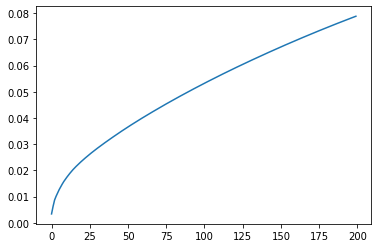

In [209]:
import matplotlib.pyplot as plt

plt.plot(pipeline.named_steps.pca.explained_variance_.cumsum())

In [217]:
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(min_df=3, max_df=1000)),
    ('tfidf_transformer', TfidfTransformer()),
    ('pca', TruncatedSVD(n_components=2000)),
    ('classifier', LogisticRegression(solver='lbfgs', max_iter=10000))
])

pipeline.fit(X_train, y_train)

print(roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1]))
print(precision_score(y_test, pipeline.predict(X_test)))

0.9391840800796956
0.853515625


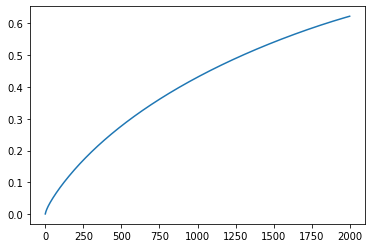

In [218]:
import matplotlib.pyplot as plt

plt.plot(pipeline.named_steps.pca.explained_variance_.cumsum())

# Multiclass

In [259]:
questions_df = pd.read_csv('./datasets/question_topic.csv')

questions_df.sample(10)

,question_text,question_topic
2832,I saw you have an e-mail newsletter. If I deci...,Sales/Promotions
2083,What are the dimensions of the cameron street ...,Product Specifications
1851,Which boys jacket would you say is thicker and...,Product Comparison
4909,Are either the Women's Prime multivitamin Item...,Product Comparison
1466,I saw you have the kobalt hammer item number 1...,Product Specifications
1940,"I may buy the Whitney nightstand #768893, but ...",Shipping
1698,I want to get an ottoman but would rather see ...,Omnichannel
2400,For product returns on something like the Camb...,Returns & Refunds
2848,Do you have any women's leather boots in gray ...,Product Availability
1715,Do you have the ability to check individual st...,Omnichannel


In [220]:
questions_df.shape

(5000, 2)

In [261]:
print(questions_df['question_topic'].unique())

['Sales/Promotions' 'Shipping' 'Product Availability'
 'Product Specifications' 'Omnichannel' 'Product Comparison'
 'Returns & Refunds']


In [262]:
X = questions_df['question_text']
y = questions_df['question_topic']

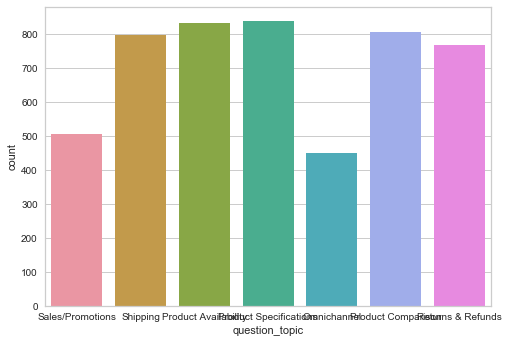

In [267]:
sns.countplot(y)

In [268]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [269]:
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(min_df=3, max_df=1000)),
    ('tfidf_transformer', TfidfTransformer()),
    ('classifier', LogisticRegression(solver='lbfgs', max_iter=10000))
])

In [270]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('count_vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1000,
                                 max_features=None, min_df=3,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, v...
                ('tfidf_transformer',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, inter

In [271]:
pipeline.predict(X_test)[:20]

array(['Returns & Refunds', 'Sales/Promotions', 'Product Specifications',
       'Shipping', 'Product Availability', 'Omnichannel',
       'Product Availability', 'Product Availability',
       'Returns & Refunds', 'Shipping', 'Product Comparison',
       'Returns & Refunds', 'Product Comparison', 'Omnichannel',
       'Returns & Refunds', 'Product Specifications', 'Shipping',
       'Product Comparison', 'Product Comparison', 'Shipping'],
      dtype=object)

In [276]:
pipeline.predict_proba(X_test)[1]

array([0.02592595, 0.04216504, 0.02512495, 0.02653083, 0.01339658,
       0.84885312, 0.01800353])

In [274]:
np.argmax(pipeline.predict_proba(X_test)[0])

4

In [295]:
pipeline.predict_proba(X_test)[:]

array([[0.00364676, 0.00588287, 0.00538259, ..., 0.94512127, 0.01208258,
        0.02143098],
       [0.02592595, 0.04216504, 0.02512495, ..., 0.01339658, 0.84885312,
        0.01800353],
       [0.01008681, 0.017647  , 0.05740872, ..., 0.00767963, 0.01203132,
        0.00924072],
       ...,
       [0.00430493, 0.94095783, 0.01642797, ..., 0.00941762, 0.00587239,
        0.00443713],
       [0.06777508, 0.0563173 , 0.11317106, ..., 0.08875242, 0.29629641,
        0.05318857],
       [0.00753478, 0.04625967, 0.87827489, ..., 0.00812275, 0.01001514,
        0.0084001 ]])

In [297]:
max_index = np.argmax(pipeline.predict_proba(X_test), axis=1)

In [301]:
# pd.DataFrame(zip(pipeline.predict_proba(X_test), pipeline.classes_[np.argmax(pipeline.predict_proba(X_test), axis=1)]))

In [302]:
from sklearn.metrics import confusion_matrix

In [303]:
confusion_matrix(y_test, pipeline.predict(X_test))

array([[38,  1,  0,  1,  0,  0,  0],
       [ 0, 80,  1,  1,  0,  0,  0],
       [ 0,  0, 76,  1,  0,  0,  0],
       [ 0,  2,  2, 69,  0,  0,  0],
       [ 0,  0,  0,  0, 81,  0,  0],
       [ 0,  1,  0,  4,  0, 62,  0],
       [ 0,  0,  0,  0,  0,  0, 80]])

In [305]:
pd.DataFrame(confusion_matrix(y_test, pipeline.predict(X_test)), columns=pipeline.classes_, index=pipeline.classes_)

,Omnichannel,Product Availability,Product Comparison,Product Specifications,Returns & Refunds,Sales/Promotions,Shipping
Omnichannel,38,1,0,1,0,0,0
Product Availability,0,80,1,1,0,0,0
Product Comparison,0,0,76,1,0,0,0
Product Specifications,0,2,2,69,0,0,0
Returns & Refunds,0,0,0,0,81,0,0
Sales/Promotions,0,1,0,4,0,62,0
Shipping,0,0,0,0,0,0,80


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


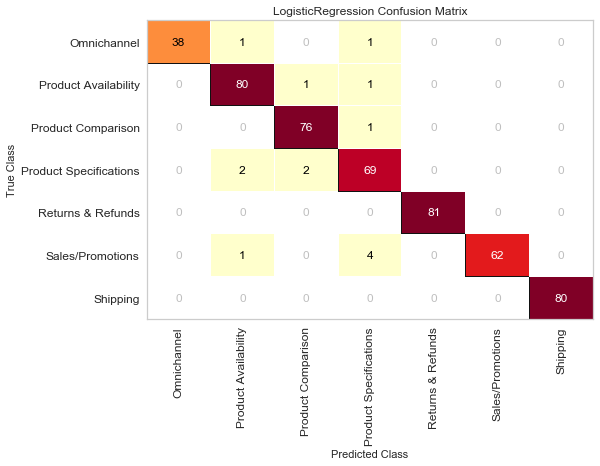

In [307]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(pipeline, classes=pipeline.classes_)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

In [310]:
roc_auc_score(y_test, pipeline.predict_proba(X_test), multi_class='ovo')

0.9993295188262717

- ovo: one vs one
- ovr: one vs rest: 

In [311]:
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(ngram_range=(2,2), min_df=3, max_df=1000)),
    ('tfidf_transformer', TfidfTransformer()),
    ('pca', TruncatedSVD(n_components=500)),
    ('classifier', LogisticRegression(solver='lbfgs', max_iter=10000))
])

In [312]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('count_vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1000,
                                 max_features=None, min_df=3,
                                 ngram_range=(2, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, v...
                 TruncatedSVD(algorithm='randomized', n_components=500,
                              n_iter=5, random_state=None, tol=0.0)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
            

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


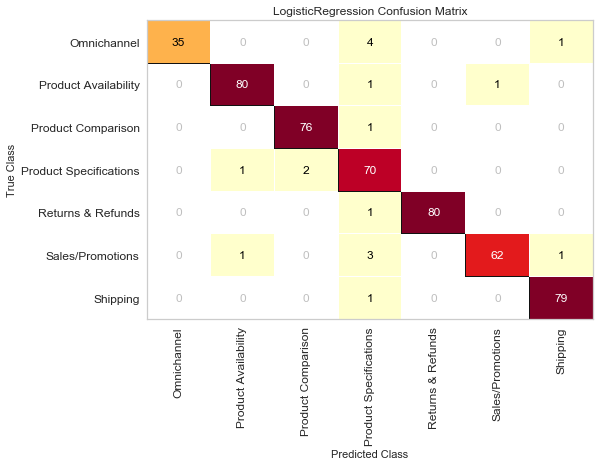

In [314]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(pipeline, classes=pipeline.classes_)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

In [315]:
roc_auc_score(y_test, pipeline.predict_proba(X_test), multi_class='ovo')

0.9992180406590017

In [318]:
precision_score(y_test, pipeline.predict(X_test), average='weighted')

0.9661465201465201

# Topic Modelling

## LDA - Latent Dirichlet Allocation

In [342]:
dbpedia_df = pd.read_csv('./datasets/dbpedia_csv/train.csv', 
                         skiprows=1, names = ['Label', 'Name', 'Text'])

In [343]:
dbpedia_df

,Label,Name,Text
0,1,Schwan-Stabilo,Schwan-STABILO is a German maker of pens for ...
1,1,Q-workshop,Q-workshop is a Polish company located in Poz...
2,1,Marvell Software Solutions Israel,Marvell Software Solutions Israel known as RA...
3,1,Bergan Mercy Medical Center,Bergan Mercy Medical Center is a hospital loc...
4,1,The Unsigned Guide,The Unsigned Guide is an online contacts dire...
...,...,...,...
559994,14,Barking in Essex,Barking in Essex is a Black comedy play direc...
559995,14,Science & Spirit,Science & Spirit is a discontinued American b...
559996,14,The Blithedale Romance,The Blithedale Romance (1852) is Nathaniel Ha...
559997,14,Razadarit Ayedawbon,Razadarit Ayedawbon (Burmese: ရာဇာဓိရာဇ် အရေး...


### DBPedia classes

- Company
- EducationalInstitution
- Artist
- Athlete
- OfficeHolder
- MeanOfTransportation
- Building
- NaturalPlace
- Village
- Animal
- Plant
- Album
- Film
- WrittenWork

In [344]:
labels = ['Company',
          'EducationalInstitution',
          'Artist',
          'Athlete',
          'OfficeHolder',
          'MeanOfTransportation',
          'Building',
          'NaturalPlace',
          'Village',
          'Animal',
          'Plant',
          'Album',
          'Film',
          'WrittenWork']

In [345]:
from sklearn.decomposition import LatentDirichletAllocation

In [346]:
dbpedia_df = dbpedia_df.sample(10000).reset_index(drop=True)

In [347]:
dbpedia_df

,Label,Name,Text
0,1,Gecko Gear,Gecko Gear is an Australian design and manufa...
1,3,Jim Lounsbury,Jim Lounsbury (February 24 1923 in Colo Iowa ...
2,9,Aminabad Nain,Aminabad (Persian: امين اباد‎ also Romanized ...
3,4,Tony Herman,Tony Herman was a rugby league footballer of ...
4,8,Chico River (Puerto Rico),The Chico River (Puerto Rico) is a river of P...
...,...,...,...
9995,13,Super Speedway,Super Speedway is a 1997 documentary racing f...
9996,13,Banarasi Babu (1973 film),Banarasi Babu is a 1973 Hindi film directed b...
9997,2,Our Own English High School,Our Own English High School is a chain of sch...
9998,3,Doogie White,Douglas Doogie White (born 7 March 1960) is a...


In [348]:
dbpedia_df.Text.loc[ dbpedia_df.Text.str.split().apply(lambda x : len(x)) < 3 ]

3808     Sule M.
Name: Text, dtype: object

In [329]:
X = dbpedia_df['Text']
y = dbpedia_df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [362]:
dataprep = Pipeline([
    ('count_vectorizer', CountVectorizer(max_df=1000, min_df=3)),
    ('tfidf_transformer', TfidfTransformer())
])


pipeline = Pipeline([
    ('dataprep', dataprep),
    ('topic_modelling', LatentDirichletAllocation(n_components=14, max_iter=100, n_jobs=-1))
])
# LDA is generative

pipeline.fit(X_train)

Pipeline(memory=None,
         steps=[('dataprep',
                 Pipeline(memory=None,
                          steps=[('count_vectorizer',
                                  CountVectorizer(analyzer='word', binary=False,
                                                  decode_error='strict',
                                                  dtype=<class 'numpy.int64'>,
                                                  encoding='utf-8',
                                                  input='content',
                                                  lowercase=True, max_df=1000,
                                                  max_features=None, min_df=3,
                                                  ngram_range=(1, 1),
                                                  preprocessor=None,
                                                  stop_words=None,
                                                  strip_accents=None,
                                                  toke

In [365]:
lda = pipeline.transform(X_test)

In [366]:
feature_names = pipeline.named_steps.dataprep.named_steps.count_vectorizer.get_feature_names()
feature_names

['00',
 '01',
 '02',
 '03',
 '05',
 '06',
 '08',
 '09',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '10th',
 '11',
 '110',
 '1100',
 '111',
 '112',
 '113',
 '1135',
 '114',
 '115',
 '116',
 '117',
 '118',
 '11th',
 '12',
 '120',
 '1200',
 '120000',
 '121',
 '122',
 '123',
 '124',
 '125',
 '12500',
 '128',
 '129',
 '12th',
 '13',
 '130',
 '1300',
 '132',
 '133',
 '135',
 '136',
 '138',
 '139',
 '13th',
 '14',
 '140',
 '1400',
 '14000',
 '142',
 '143',
 '144',
 '1441',
 '145',
 '146',
 '148',
 '149',
 '14th',
 '15',
 '150',
 '1500',
 '151',
 '156',
 '157',
 '158',
 '15th',
 '16',
 '160',
 '1600',
 '162',
 '1634',
 '165',
 '1650',
 '1654',
 '1660',
 '1666',
 '167',
 '169',
 '16th',
 '17',
 '1700',
 '1705',
 '1707',
 '171',
 '1711',
 '172',
 '1725',
 '174',
 '1740',
 '1745',
 '1748',
 '1749',
 '175',
 '1750',
 '1757',
 '1758',
 '1760',
 '1761',
 '1762',
 '1768',
 '1769',
 '1772',
 '1775',
 '1776',
 '1777',
 '1778',
 

In [367]:
def get_topic(identifier, top_words=10):
    
    for topic_id, topic_word_probs in enumerate(pipeline.named_steps.topic_modelling.components_):
        if topic_id == identifier:
            top_feature_names = [feature_names[i] for i in topic_word_probs.argsort()[: -top_words - 1 : -1]]
            
            return " ".join(top_feature_names)

In [368]:
topic_id_topic_mapping = {}

for i in range(14):
    topic_id_topic_mapping[i] = get_topic(i, top_words=3)
    
# these are words that are most probable to encounter in topic i
topic_id_topic_mapping

{0: 'church car parish',
 1: 'album released band',
 2: 'olympics summer competed',
 3: 'school high located',
 4: 'family genus species',
 5: 'she who football',
 6: 'mi village river',
 7: 'company university college',
 8: 'species family found',
 9: 'film directed novel',
 10: 'river district tributary',
 11: 'historic house building',
 12: 'village municipality turkey',
 13: 'bulbophyllum orchid species'}

In [376]:
X_test

6252     Loricaria thuyoides is a terrestrial shrub in...
4684     Parallel Lives is a 1994 television film dire...
1731     Elachista compsa is a moth of the Elachistida...
4742     Jowzjan (Persian: جوزجان‎ also Romanized as J...
4521     Happy Feet Two is a 2011 Australian-American ...
                              ...                        
3921     The Brookstreet Hotel is a modern luxury hote...
6685     Amber and Iron is a fantasy novel in the Drag...
3194     Dar Mazar (Persian: درمزار‎ also Romanized as...
1941     Gulf Branch is a stream in Arlington County V...
7713     Hayesbrook is a secondary school with academy...
Name: Text, Length: 1000, dtype: object

In [377]:
lda[-4]

array([0.01512807, 0.08785264, 0.01512806, 0.01512807, 0.01512806,
       0.08042077, 0.01512807, 0.01512831, 0.0151281 , 0.66531742,
       0.01512806, 0.01512807, 0.01512806, 0.01512824])

In [361]:
labels

['Company',
 'EducationalInstitution',
 'Artist',
 'Athlete',
 'OfficeHolder',
 'MeanOfTransportation',
 'Building',
 'NaturalPlace',
 'Village',
 'Animal',
 'Plant',
 'Album',
 'Film',
 'WrittenWork']

In [379]:
X_vis = pd.DataFrame(X_test)

In [380]:
X_vis

,Text
6252,Loricaria thuyoides is a terrestrial shrub in...
4684,Parallel Lives is a 1994 television film dire...
1731,Elachista compsa is a moth of the Elachistida...
4742,Jowzjan (Persian: جوزجان‎ also Romanized as J...
4521,Happy Feet Two is a 2011 Australian-American ...
...,...
3921,The Brookstreet Hotel is a modern luxury hote...
6685,Amber and Iron is a fantasy novel in the Drag...
3194,Dar Mazar (Persian: درمزار‎ also Romanized as...
1941,Gulf Branch is a stream in Arlington County V...


In [381]:
topic_to_doc_mapping = {}
topic_list = []
topic_names = []

for i in range(X_test.shape[0]):
    most_likely_topic =  lda[i].argmax()

    if most_likely_topic not in topic_to_doc_mapping:
        topic_to_doc_mapping[most_likely_topic] = []

    topic_to_doc_mapping[most_likely_topic].append(i)

    topic_list.append(most_likely_topic)
    topic_names.append(topic_id_topic_mapping[most_likely_topic])

X_vis['Most_Likely_Topic'] = topic_list
X_vis['Most_Likely_Topic_Names'] = topic_names

In [387]:
X_vis

,Text,Most_Likely_Topic,Most_Likely_Topic_Names
6252,Loricaria thuyoides is a terrestrial shrub in...,11,historic house building
4684,Parallel Lives is a 1994 television film dire...,9,film directed novel
1731,Elachista compsa is a moth of the Elachistida...,8,species family found
4742,Jowzjan (Persian: جوزجان‎ also Romanized as J...,10,river district tributary
4521,Happy Feet Two is a 2011 Australian-American ...,9,film directed novel
...,...,...,...
3921,The Brookstreet Hotel is a modern luxury hote...,7,company university college
6685,Amber and Iron is a fantasy novel in the Drag...,9,film directed novel
3194,Dar Mazar (Persian: درمزار‎ also Romanized as...,10,river district tributary
1941,Gulf Branch is a stream in Arlington County V...,6,mi village river


In [383]:
labels

['Company',
 'EducationalInstitution',
 'Artist',
 'Athlete',
 'OfficeHolder',
 'MeanOfTransportation',
 'Building',
 'NaturalPlace',
 'Village',
 'Animal',
 'Plant',
 'Album',
 'Film',
 'WrittenWork']

In [71]:
X_vis.Most_Likely_Topic_Names.unique()

array(['company university college', 'built historic navy',
       'film album released', 'river district village',
       'species family genus', 'football who played',
       'journal published newspaper', 'gastropod marine sea',
       'school high public', 'species plant endemic', 'moths snout cave',
       'peak czech alps', 'aircraft designed car'], dtype=object)

In [72]:
print(labels)

['Company', 'EducationalInstitution', 'Artist', 'Athlete', 'OfficeHolder', 'MeanOfTransportation', 'Building', 'NaturalPlace', 'Village', 'Animal', 'Plant', 'Album', 'Film', 'WrittenWork']


In [73]:
X_vis

,Text,Most_Likely_Topic,Most_Likely_Topic_Names
6252,The Art Institute of California A College of ...,3,company university college
4684,Great Manson Farm is a property on the northe...,7,built historic navy
1731,The Cannonball Adderley Quintet in San Franci...,6,film album released
4742,Joy Dawson is a New Zealand missionary and in...,6,film album released
4521,Deshbandhu Mahavidyalaya established in 1973 ...,3,company university college
...,...,...,...
3921,Mandy was a 1952 Ealing Studios film based on...,6,film album released
6685,Inferno in diretta internationally released a...,6,film album released
3194,Pina is a 2011 German 3D documentary film abo...,6,film album released
1941,The Orlando Miracle was a Women's National Ba...,6,film album released


In [388]:
lda.shape

(1000, 14)

In [389]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, init = 'pca', random_state = 0)

lda_2d_tsne = tsne.fit_transform(lda)
lda_df_tsne = pd.DataFrame(lda_2d_tsne)

lda_df_tsne.shape

(1000, 2)

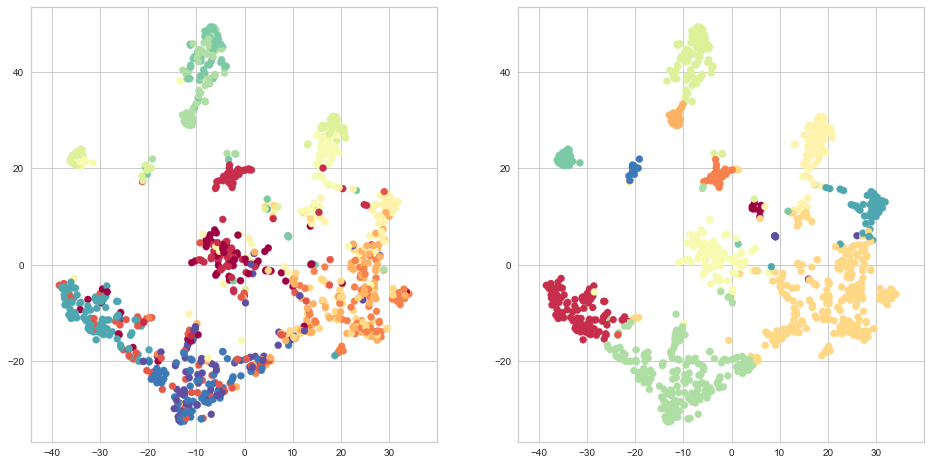

In [393]:
fig, axes = plt.subplots(1, 2, figsize = (16, 8))


axes[0].scatter(lda_df_tsne[0], lda_df_tsne[1], c = y_test, cmap = 'Spectral')
axes[1].scatter(lda_df_tsne[0], lda_df_tsne[1], c = X_vis['Most_Likely_Topic'], cmap = 'Spectral')

axes[0].axis('equal');
axes[1].axis('equal');

In [ ]:
# !pip install pyLDAvis

In [395]:
pipeline.named_steps

{'dataprep': Pipeline(memory=None,
          steps=[('count_vectorizer',
                  CountVectorizer(analyzer='word', binary=False,
                                  decode_error='strict',
                                  dtype=<class 'numpy.int64'>, encoding='utf-8',
                                  input='content', lowercase=True, max_df=1000,
                                  max_features=None, min_df=3,
                                  ngram_range=(1, 1), preprocessor=None,
                                  stop_words=None, strip_accents=None,
                                  token_pattern='(?u)\\b\\w\\w+\\b',
                                  tokenizer=None, vocabulary=None)),
                 ('tfidf_transformer',
                  TfidfTransformer(norm='l2', smooth_idf=True,
                                   sublinear_tf=False, use_idf=True))],
          verbose=False),
 'topic_modelling': LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
               

In [396]:
pipeline.named_steps.dataprep.transform(X_train)

<9000x9802 sparse matrix of type '<class 'numpy.float64'>'
	with 208852 stored elements in Compressed Sparse Row format>

In [398]:
import pyLDAvis.sklearn
 
pyLDAvis.enable_notebook()

panel = pyLDAvis.sklearn.prepare(pipeline.named_steps.topic_modelling, 
                                 pipeline.named_steps.dataprep.transform(X_train), 
                                 pipeline.named_steps.dataprep.named_steps.count_vectorizer, 
                                 mds='pca')

panel

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.219727  0.051449       1        1  19.060788
9     -0.215249 -0.035189       2        1  16.057878
7     -0.075455  0.031100       3        1   9.320679
8      0.005265  0.105274       4        1   8.437864
1     -0.160466 -0.065219       5        1   8.277331
11     0.007303  0.021290       6        1   7.623268
6      0.074842  0.238258       7        1   7.382176
0      0.052155 -0.065352       8        1   4.746832
10     0.131526  0.054098       9        1   4.257965
3      0.069403 -0.037665      10        1   4.162631
4      0.081573 -0.070774      11        1   3.017916
2      0.074731 -0.099495      12        1   2.711781
12     0.093416 -0.039642      13        1   2.564282
13     0.080684 -0.088132      14        1   2.378609, topic_info=         Term        Freq       Total Category  logprob  loglift
7851   school  123.000000  123.000000  Default  30.0000  30.0000
7603    river  119.000000  119.000000  Default  29.0000  29.0000
797     album  102.000000  102.000000  Default  28.0000  28.0000
3569   family  117.000000  117.000000  Default  27.0000  27.0000
8342  species  115.000000  115.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
1993  changes    1.740153    3.718714  Topic14  -6.2676   2.9792
8342  species    4.818497  115.365081  Topic14  -5.2492   0.5630
7295    reach    1.871339    5.177945  Topic14  -6.1950   2.7209
4001    genus    3.750695   81.503606  Topic14  -5.4997   0.6599
1402  belongs    1.594009    7.816584  Topic14  -6.3554   2.1487

[734 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
36        1  0.465283    12
36        3  0.035791    12
36        4  0.071582    12
36        5  0.035791    12
36        6  0.035791    12
...     ...       ...   ...
9736      6  0.378487  york
9736      7  0.031541  york
9773      9  0.841521    īn
9774      7  0.884859  łódź
9787      9  0.940315  اباد

[1344 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 10, 8, 9, 2, 12, 7, 1, 11, 4, 5, 3, 13, 14])

----

In [399]:
dataprep = Pipeline([
    ('count_vectorizer', CountVectorizer(ngram_range=(2,2), max_df=1000, min_df=3)),
    ('tfidf_transformer', TfidfTransformer())
])


pipeline = Pipeline([
    ('dataprep', dataprep),
    ('topic_modelling', LatentDirichletAllocation(n_components=14, max_iter=100))
])

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('dataprep',
                 Pipeline(memory=None,
                          steps=[('count_vectorizer',
                                  CountVectorizer(analyzer='word', binary=False,
                                                  decode_error='strict',
                                                  dtype=<class 'numpy.int64'>,
                                                  encoding='utf-8',
                                                  input='content',
                                                  lowercase=True, max_df=1000,
                                                  max_features=None, min_df=3,
                                                  ngram_range=(2, 2),
                                                  preprocessor=None,
                                                  stop_words=None,
                                                  strip_accents=None,
                                                  toke

In [400]:
lda = pipeline.transform(X_test)

In [401]:
feature_names = pipeline.named_steps.dataprep.named_steps.count_vectorizer.get_feature_names()

In [402]:
topic_id_topic_mapping = {}

for i in range(14):
    topic_id_topic_mapping[i] = get_topic(i, top_words=4)
    
topic_id_topic_mapping

{0: 'species of is species family it found in',
 1: 'she was world war royal navy the royal',
 2: 'genus of is genus native to the family',
 3: 'is village village in district of population was',
 4: 'album by released in was released the album',
 5: 'directed by film directed the film member of',
 6: 'summer olympics is village village in the municipality',
 7: 'arctiidae family the arctiidae the valea diocese of',
 8: 'located in high school is located on the',
 9: 'published in novel by published by the book',
 10: 'is river up to river of to the',
 11: 'is an an american best known bavaria germany',
 12: 'italian comedy rugby league is an minister of',
 13: 'tributary of river in river is is tributary'}

In [403]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, init = 'pca', random_state = 0)

lda_2d_tsne = tsne.fit_transform(lda)
lda_df_tsne = pd.DataFrame(lda_2d_tsne)

lda_df_tsne.shape


(1000, 2)

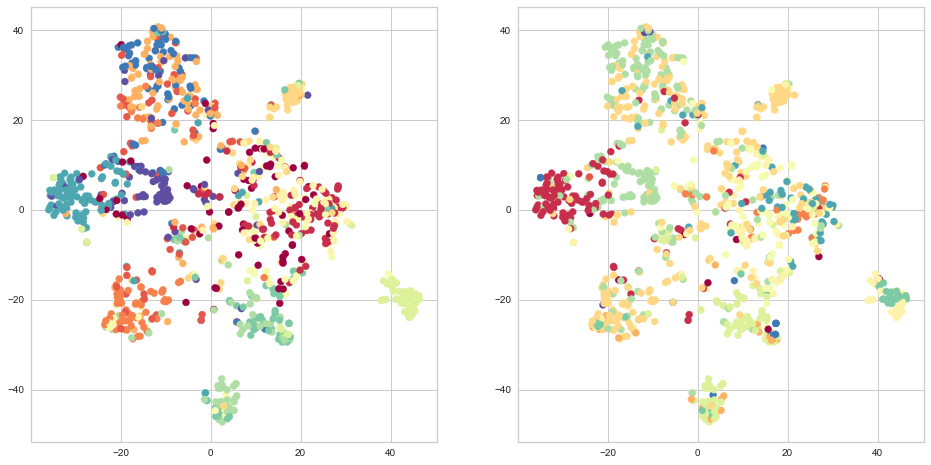

In [404]:
fig, axes = plt.subplots(1, 2, figsize = (16, 8))


axes[0].scatter(lda_df_tsne[0], lda_df_tsne[1], c = y_test, cmap = 'Spectral')
axes[1].scatter(lda_df_tsne[0], lda_df_tsne[1], c = X_vis['Most_Likely_Topic'], cmap = 'Spectral')

axes[0].axis('equal');
axes[1].axis('equal');

In [405]:
import pyLDAvis.sklearn
 
pyLDAvis.enable_notebook()

panel = pyLDAvis.sklearn.prepare(pipeline.named_steps.topic_modelling, 
                                 pipeline.named_steps.dataprep.transform(X_train), 
                                 pipeline.named_steps.dataprep.named_steps.count_vectorizer, 
                                 mds='tsne')

panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
8        1.425140 -203.131439       1        1  17.238142
5       93.696953  -55.018154       2        1  11.153805
4      141.694016   25.320429       3        1   8.231860
13    -126.233505    5.739788       4        1   8.049458
1      -59.868134  101.519302       5        1   7.309499
3      151.966629  133.119141       6        1   6.329595
0       12.542690 -101.441658       7        1   6.265010
9       49.372585   57.773476       8        1   6.202613
2      203.505997  -84.541840       9        1   5.875164
11     119.923477 -166.068970      10        1   5.378933
10     -19.315592   -8.882428      11        1   5.044072
7      -95.841057 -109.373474      12        1   4.570779
6       37.554749  165.057098      13        1   4.278644
12     243.648911   32.733547      14        1   4.072425, topic_info=             Term       Freq      Total Category  logprob  loglift
17331  village in  58.000000  58.000000  Default  30.0000  30.0000
9084   is village  60.000000  60.000000  Default  29.0000  29.0000
14323  species of  65.000000  65.000000  Default  28.0000  28.0000
9028   is species  61.000000  61.000000  Default  27.0000  27.0000
5944    family it  39.000000  39.000000  Default  26.0000  26.0000
...           ...        ...        ...      ...      ...      ...
18083    with the   1.356355  32.904705  Topic14  -7.0178   0.0121
11988      one of   1.268006  36.645151  Topic14  -7.0851  -0.1629
17599     was one   1.120283   6.850121  Topic14  -7.2090   1.3902
3031       at the   1.266210  63.610735  Topic14  -7.0865  -0.7158
16368   the world   1.161498  13.172017  Topic14  -7.1729   0.7725

[701 rows x 6 columns], token_table=       Topic      Freq                 Term
term                                       
478       14  0.582626             1970 and
620       14  0.646976              1987 is
658       12  0.892185           1991 nepal
785       13  0.837260          2002 census
833        6  0.981723          2006 census
...      ...       ...                  ...
18200      8  0.328156           written by
18207     11  0.702514  württemberg germany
18309     13  0.501313      zanjan province
18321     12  0.838863              zone of
18328      9  0.693144     łódź voivodeship

[1165 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 6, 5, 14, 2, 4, 1, 10, 3, 12, 11, 8, 7, 13])

In [406]:
labels

['Company',
 'EducationalInstitution',
 'Artist',
 'Athlete',
 'OfficeHolder',
 'MeanOfTransportation',
 'Building',
 'NaturalPlace',
 'Village',
 'Animal',
 'Plant',
 'Album',
 'Film',
 'WrittenWork']